# WeatherPy

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls

In [18]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
        
        
        

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | arlit
Processing Record 7 of Set 1 | ellisras
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | turangi
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | mkushi
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | yeehaw junction
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | saleaula
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv("../data/city_data.csv", index_label="City_ID")

city_data_df.count()



City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Windspeed     600
Country       600
Date          600
dtype: int64

In [20]:
# Display the city Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,albany,42.6001,-73.9662,53.28,83,100,0.85,US,1697638361
1,ushuaia,-54.8000,-68.3000,58.66,45,0,10.36,AR,1697638567
2,cabo san lucas,22.8909,-109.9124,82.76,75,20,6.91,MX,1697638621
3,hobart,-42.8794,147.3294,52.05,91,98,5.75,AU,1697638502
4,longyearbyen,78.2186,15.6401,28.24,64,75,12.66,SJ,1697638649


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

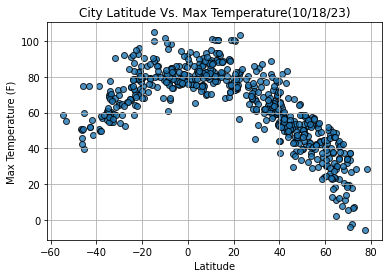

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("../Python_API/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

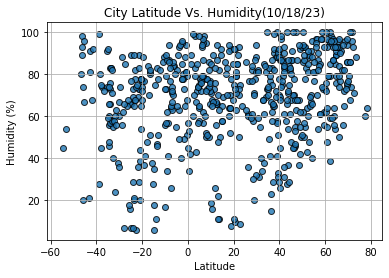

In [22]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../Python_API/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

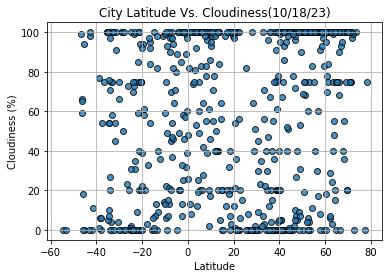

In [23]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../Python_API/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

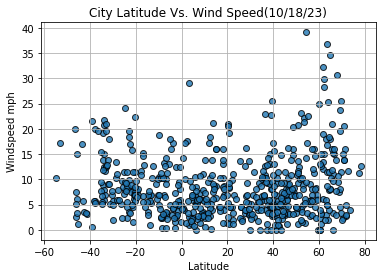

In [24]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../Python_API/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [25]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.881478267312537


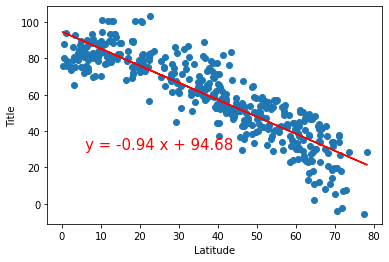

In [27]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6940654590813452


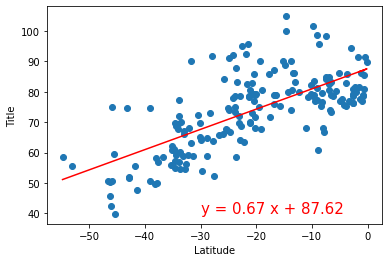

In [28]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20565940485858655


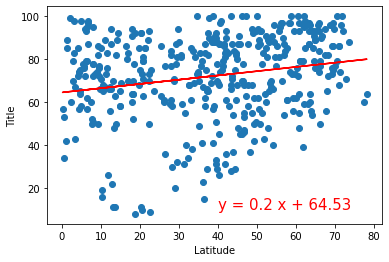

In [29]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07922289003513346


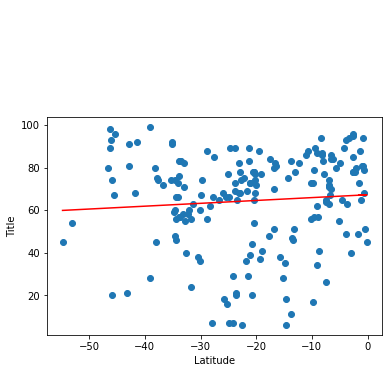

In [30]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11248611240599068


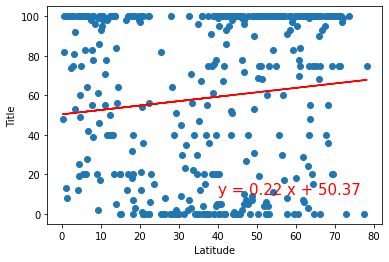

In [31]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12841316574284808


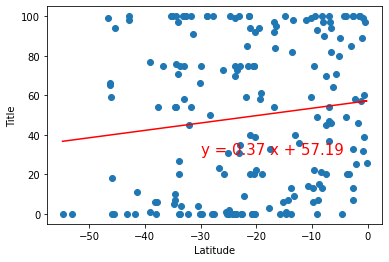

In [32]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2497450580827231


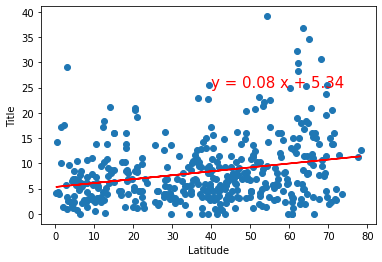

In [33]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24781074417768753


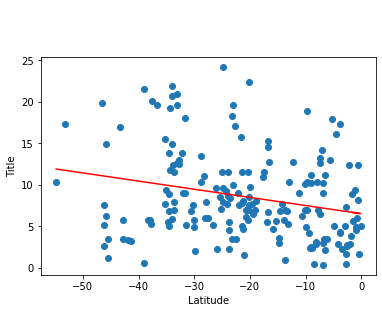

In [34]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))